<a href="https://colab.research.google.com/github/rr4323/data_scientist_mastry/blob/main/student_profile_clustering/student_profile_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the student social network profile data from "https://www.kaggle.com/datasets/zabihullah18/students-social-network-profile-clustering/data" by performing EDA, visualizations, handling distributions, outliers, and scaling. Then, apply K-Means, Hierarchical, and DBSCAN clustering methods to segment students and compare their silhouette scores to identify the best model.

## Download and load data

### Subtask:
Download the dataset from the provided Kaggle link and load it into a pandas DataFrame.


**Reasoning**:
The first step is to download the dataset from the provided URL. Since it is a Kaggle dataset, I will use the Kaggle API to download it. Then I will read the downloaded CSV file into a pandas DataFrame and display the head and info.



**Reasoning**:
The previous command failed because the `opendatasets` module was not found. I need to install this module before I can download the dataset.



In [2]:
%pip install opendatasets

**Reasoning**:
The `opendatasets` package has been successfully installed. Now I can retry downloading the dataset, reading it into a pandas DataFrame, and displaying the head and info.



In [22]:
import pandas as pd
import opendatasets as od

# Download the dataset using opendatasets
od.download("https://www.kaggle.com/datasets/zabihullah18/students-social-network-profile-clustering/data")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/students-social-network-profile-clustering/03_Clustering_Marketing.csv")

# Display the first 5 rows and information of the DataFrame
display(df.head())
display(df.info())

Skipping, found downloaded files in "./students-social-network-profile-clustering" (use force=True to force download)


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

None

**Reasoning**:
The dataset was downloaded as a zip file, and the previous attempt to read 'Live.csv' directly failed because the file was not found at the expected path. I need to unzip the downloaded file and then read the correct CSV file into a pandas DataFrame.



## Exploratory Data Analysis (EDA)

### Subtask:
Perform initial EDA to understand the data structure, variable types, and summary statistics.

**Reasoning**:
To understand the data, I will start by checking the shape of the DataFrame to see the number of rows and columns. Then, I will use `display(df.info())` to get a concise summary of the DataFrame, including the index dtype and column dtypes, non-null values, and memory usage. This will help identify missing values and the data types of each column. Finally, I will use `display(df.describe())` to generate descriptive statistics that summarize the central tendency, dispersion, and shape of the distribution of numerical columns.

In [23]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get information about the DataFrame
display(df.info())

# Generate descriptive statistics for numerical columns
display(df.describe())

Shape of the DataFrame: (15000, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 


None

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,...,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


## Data Visualization

### Subtask:
Create visualizations to explore the distributions of variables, relationships between features, and identify potential patterns or outliers.

**Reasoning**:
To visualize the distribution of numerical features, I will create histograms for a selection of columns. This will help in understanding the shape of the distributions and identifying potential skewness or outliers. I will select a few representative numerical columns for this visualization.

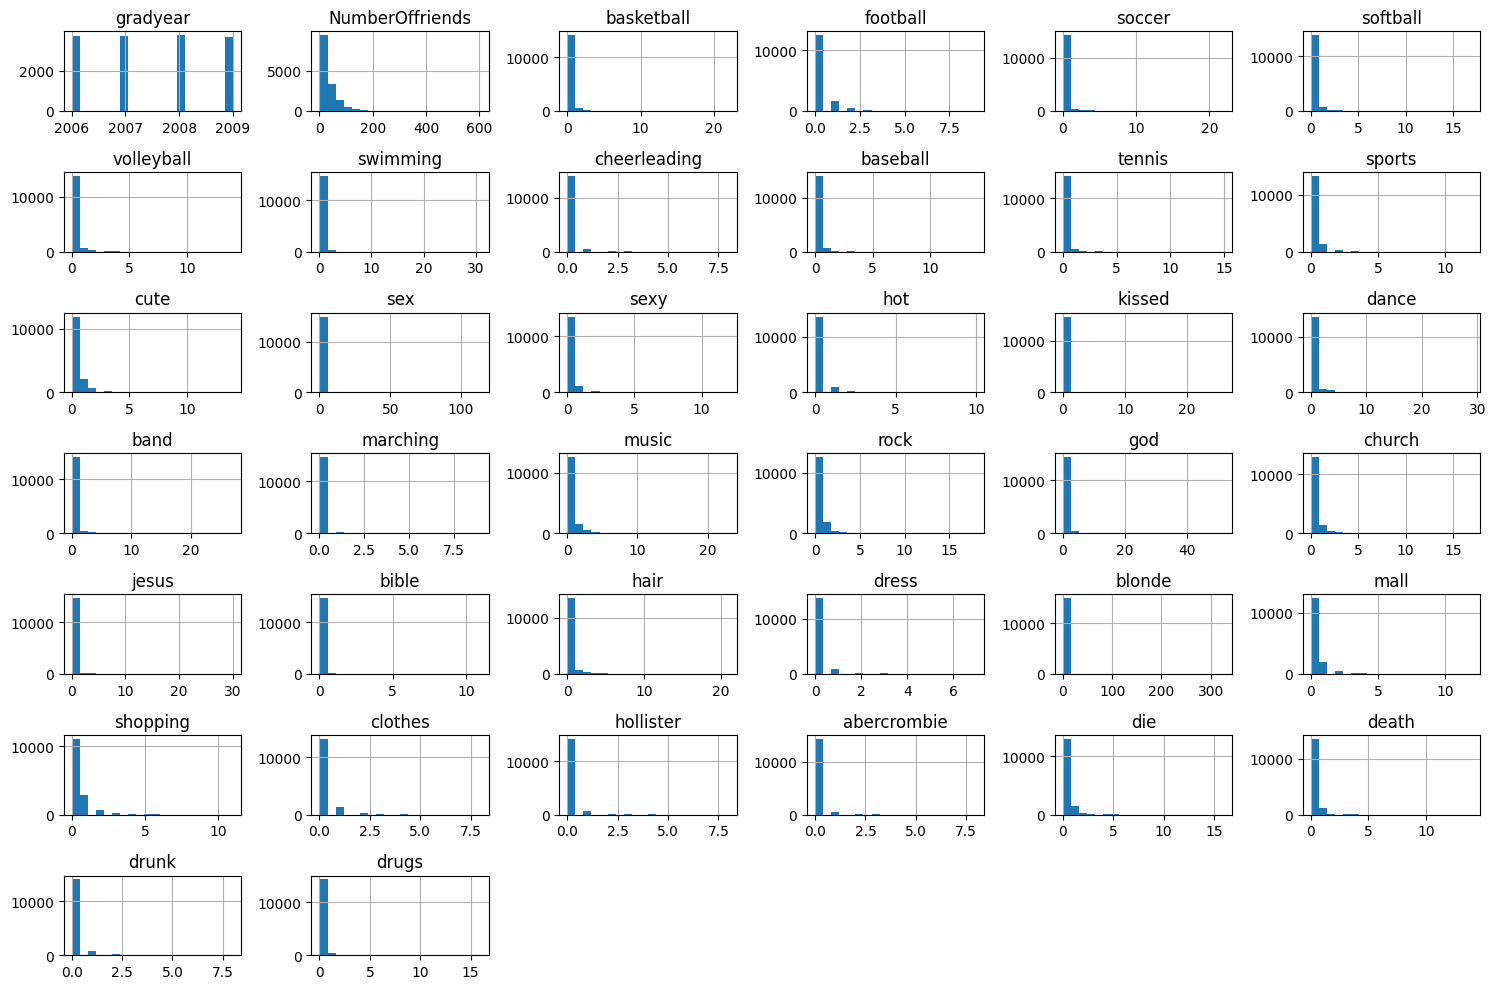

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few numerical columns for visualization
numerical_cols = df.columns

# Create histograms for the selected numerical columns
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [27]:
df['gender'].value_counts(dropna = False) #display NaN values also

,count
gender,
F,11057
M,2606
NaN,1337


In [29]:


df['gender'].fillna('not disclosed', inplace = True)



/tmp/ipython-input-2189176746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna('not disclosed', inplace = True)


In [31]:
df['age'].isna().sum()

np.int64(2496)

In [34]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [35]:


df['age'] = df.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.mean()))



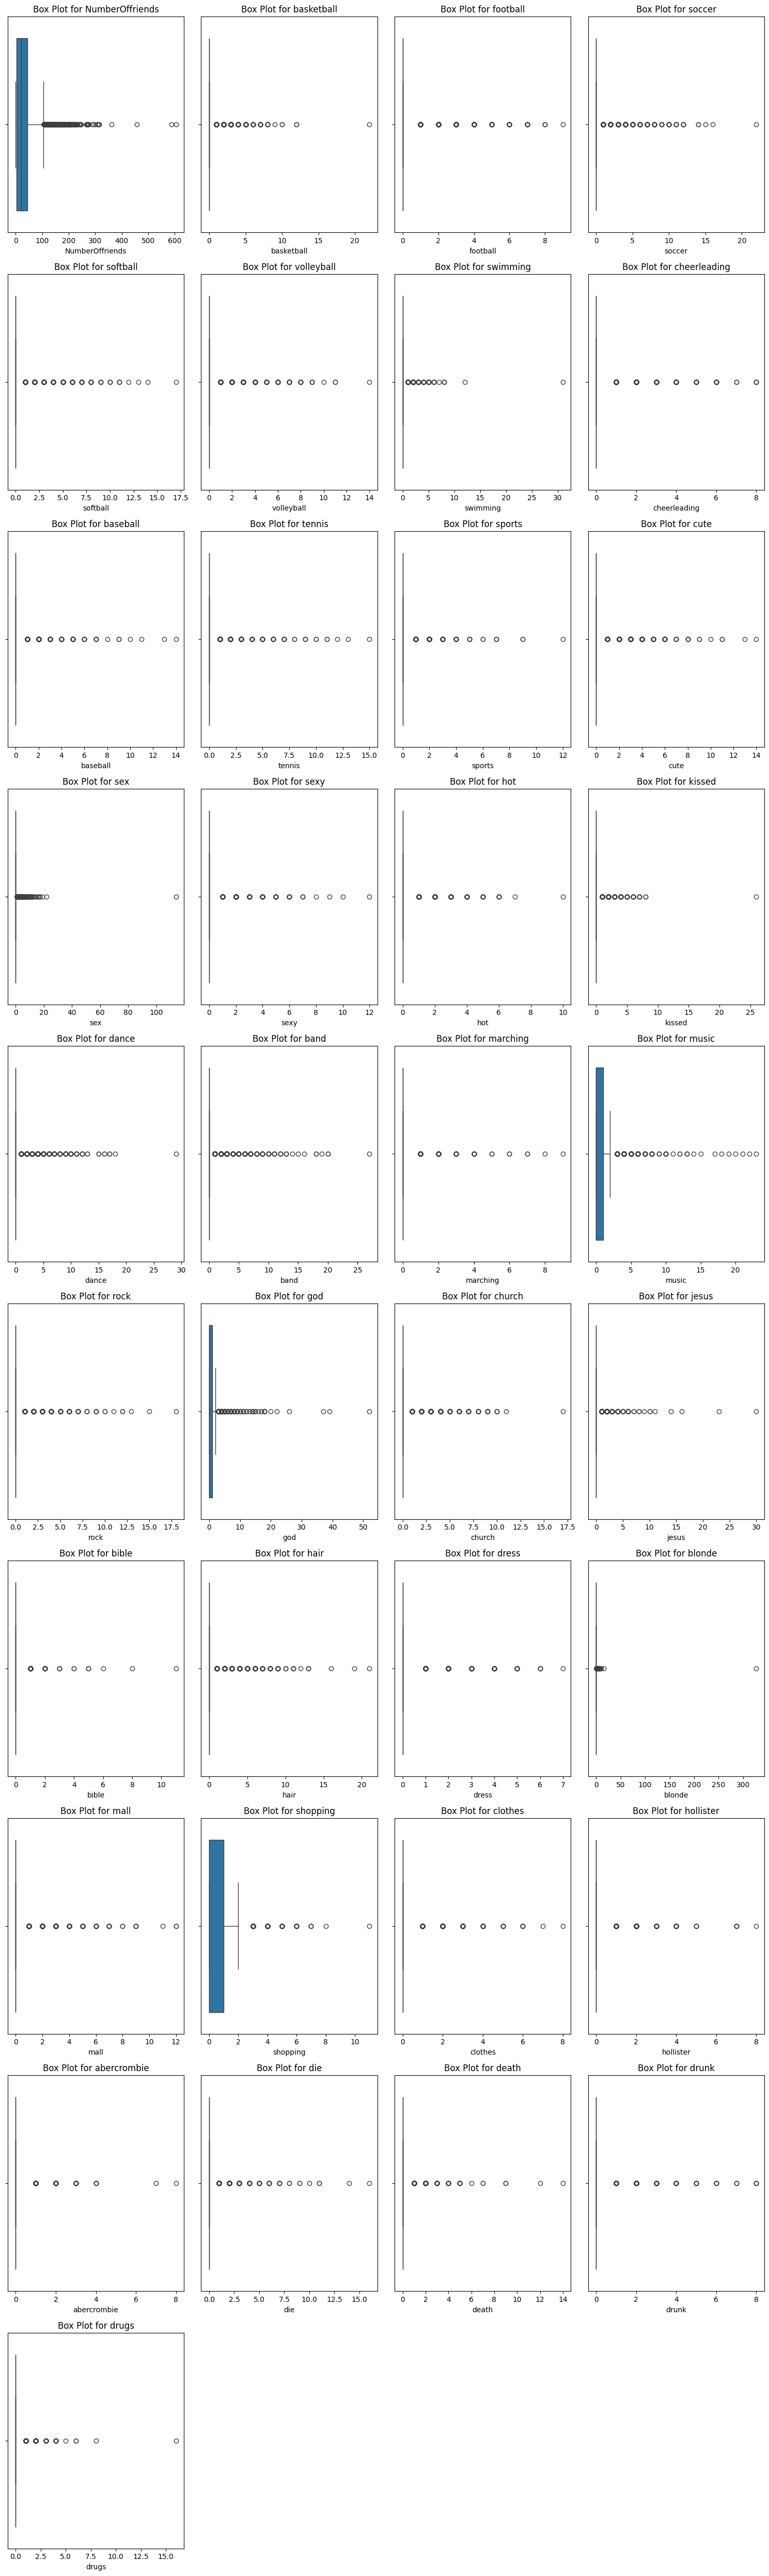

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier visualization (excluding 'gradyear' and 'age' as they have been handled or are not suitable for this visualization)
numerical_cols_for_outliers = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'gradyear' in numerical_cols_for_outliers:
    numerical_cols_for_outliers.remove('gradyear')
if 'age' in numerical_cols_for_outliers:
    numerical_cols_for_outliers.remove('age')


# Create box plots for the selected numerical columns
# We'll plot them in a loop or in subplots if there are many columns
n_cols = 4
n_rows = (len(numerical_cols_for_outliers) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))
for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

## Handle feature scaling

### Subtask:
Apply feature scaling (e.g., standardization or normalization) as required by the clustering algorithms.


**Reasoning**:
Finally, I will apply StandardScaler to scale the selected numerical columns and store the scaled data in a new DataFrame.



In [37]:
from sklearn.preprocessing import StandardScaler
names = df.columns[4:40]
features = df[names]
features.head()
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[names] = features
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,1.051334,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,-0.041671,-0.368365,-0.490423,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926


## Data preprocessing for clustering

### Subtask:
Prepare the data for clustering by handling categorical variables and selecting relevant features.


**Reasoning**:
Handle the 'gender' categorical column by converting it into numerical format using one-hot encoding, concatenate it with the scaled numerical features, and then review the resulting DataFrame to ensure it is ready for clustering.



In [40]:
# Handle the 'gender' categorical column using one-hot encoding
df_gender_encoded = pd.get_dummies(df['gender'], prefix='gender', dummy_na=False)

# Concatenate the one-hot encoded 'gender' column with the df_scaled DataFrame
df_processed_for_clustering = pd.concat([df, df_gender_encoded], axis=1)

# Review the resulting DataFrame
display(df_processed_for_clustering.head())
display(df_processed_for_clustering.info())
df_processed_for_clustering.drop(['gender'], axis=1, inplace=True)

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M,gender_not disclosed
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,False,False,True
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926,True,False,False
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582,True,False,False
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,True,False,False
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gradyear              15000 non-null  int64  
 1   gender                15000 non-null  object 
 2   age                   15000 non-null  float64
 3   NumberOffriends       15000 non-null  int64  
 4   basketball            15000 non-null  float64
 5   football              15000 non-null  float64
 6   soccer                15000 non-null  float64
 7   softball              15000 non-null  float64
 8   volleyball            15000 non-null  float64
 9   swimming              15000 non-null  float64
 10  cheerleading          15000 non-null  float64
 11  baseball              15000 non-null  float64
 12  tennis                15000 non-null  float64
 13  sports                15000 non-null  float64
 14  cute                  15000 non-null  float64
 15  sex                

None

## K-means clustering

### Subtask:
Apply K-Means clustering to segment the students and evaluate the results using the silhouette score.


**Reasoning**:
Import necessary libraries and determine the optimal number of clusters for K-Means using the silhouette score within a range of 2 to 10 clusters. Then, train the final KMeans model with the optimal number of clusters and add the cluster labels to the original DataFrame. Finally, print the silhouette scores and the optimal number of clusters.



In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the appropriate number of clusters using silhouette scores
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_processed_for_clustering)
    silhouette_avg = silhouette_score(df_processed_for_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

# Identify the optimal number of clusters
optimal_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
optimal_silhouette_score = max(silhouette_scores)

print(f"\nOptimal number of clusters: {optimal_n_clusters}")
print(f"Optimal silhouette score: {optimal_silhouette_score}")

# Train the final K-Means model with the optimal number of clusters
final_kmeans_model = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
final_cluster_labels = final_kmeans_model.fit_predict(df_processed_for_clustering)

# Add the cluster labels to the original DataFrame
df['kmeans_cluster'] = final_cluster_labels

# Display the first few rows with the new cluster column
display(df.head())

For n_clusters = 2, the silhouette score is 0.6251246491903679
For n_clusters = 3, the silhouette score is 0.5634155093301403
For n_clusters = 4, the silhouette score is 0.5125295738354047
For n_clusters = 5, the silhouette score is 0.48108327175067905
For n_clusters = 6, the silhouette score is 0.488093919559917
For n_clusters = 7, the silhouette score is 0.45961819145092775
For n_clusters = 8, the silhouette score is 0.4451094879382965
For n_clusters = 9, the silhouette score is 0.43541755833239665
For n_clusters = 10, the silhouette score is 0.41054864083000875

Optimal number of clusters: 2
Optimal silhouette score: 0.6251246491903679


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,kmeans_cluster
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926,0
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,1.051334,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582,0
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,-0.368365,-0.490423,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0


## Hierarchical clustering

### Subtask:
Apply Hierarchical clustering to segment the students and evaluate the results using the silhouette score.


**Reasoning**:
Import the necessary libraries, apply Hierarchical clustering with the optimal number of clusters found from K-Means, calculate the silhouette score, and add the cluster labels to the original DataFrame.



In [42]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Determine the number of clusters (using the optimal number found for K-Means)
n_clusters_hierarchical = optimal_n_clusters

# Initialize and fit the AgglomerativeClustering model
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters_hierarchical)
hierarchical_labels = hierarchical_model.fit_predict(df_processed_for_clustering)

# Calculate the silhouette score
silhouette_avg_hierarchical = silhouette_score(df_processed_for_clustering, hierarchical_labels)

# Print the silhouette score
print(f"The silhouette score for Hierarchical Clustering with {n_clusters_hierarchical} clusters is: {silhouette_avg_hierarchical}")

# Add the Hierarchical cluster labels to the original DataFrame
df['hierarchical_cluster'] = hierarchical_labels

# Display the head of the updated DataFrame
display(df.head())

The silhouette score for Hierarchical Clustering with 2 clusters is: 0.5330644222942912


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,kmeans_cluster,hierarchical_cluster
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,1
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926,0,0
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582,0,0
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,0
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,-0.490423,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,1


## Dbscan clustering

### Subtask:
Apply DBSCAN clustering to segment the students and evaluate the results using the silhouette score.


**Reasoning**:
Apply DBSCAN clustering, calculate the silhouette score, and add the cluster labels to the DataFrame.



In [43]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize a DBSCAN model. Experimenting with eps and min_samples might be needed.
# Let's start with some initial values based on typical data scales and density.
# A common approach is to plot the k-distance graph to estimate epsilon, but for this task,
# we will start with some empirical values and note that optimization might be required.
dbscan = DBSCAN(eps=0.5, min_samples=5) # Initial values, subject to tuning

# Fit the DBSCAN model to the preprocessed data
dbscan.fit(df_processed_for_clustering)

# Get the cluster labels
dbscan_labels = dbscan.labels_

# Filter out noise points (label -1) for silhouette score calculation
non_noise_indices = dbscan_labels != -1
filtered_data = df_processed_for_clustering[non_noise_indices]
filtered_labels = dbscan_labels[non_noise_indices]

# Calculate the silhouette score if there are more than one cluster (excluding noise)
if len(set(filtered_labels)) > 1:
    silhouette_avg_dbscan = silhouette_score(filtered_data, filtered_labels)
    print(f"The silhouette score for DBSCAN is: {silhouette_avg_dbscan}")
else:
    print("DBSCAN resulted in only one cluster (excluding noise) or no clusters with more than one point. Silhouette score cannot be calculated.")


# Add the DBSCAN cluster labels to the original DataFrame
df['dbscan_cluster'] = dbscan_labels

# Display the head of the updated DataFrame
display(df.head())

The silhouette score for DBSCAN is: 0.722111915328902


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,kmeans_cluster,hierarchical_cluster,dbscan_cluster
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,1,0
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926,0,0,-1
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582,0,0,-1
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,0,-1
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,1,-1


## Compare silhouette scores

### Subtask:
Compare the silhouette scores obtained from the three clustering methods to determine which model performs best.


**Reasoning**:
Print and compare the silhouette scores from the three clustering methods to determine the best model.



In [44]:
# Print the silhouette scores
print(f"K-Means Silhouette Score: {optimal_silhouette_score}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_avg_hierarchical}")
if 'silhouette_avg_dbscan' in locals():
    print(f"DBSCAN Silhouette Score: {silhouette_avg_dbscan}")
else:
    print("DBSCAN Silhouette Score could not be calculated (only one cluster or no clusters with more than one point).")

# Compare the scores and identify the best model
scores = {
    "K-Means": optimal_silhouette_score,
    "Hierarchical Clustering": silhouette_avg_hierarchical
}

if 'silhouette_avg_dbscan' in locals():
    scores["DBSCAN"] = silhouette_avg_dbscan

best_model = max(scores, key=scores.get)
highest_score = scores[best_model]

print(f"\nComparison of Silhouette Scores:")
for model, score in scores.items():
    print(f"{model}: {score:.4f}")

print(f"\nBased on the silhouette scores, the best performing model is: {best_model} with a score of {highest_score:.4f}")

# Interpret the results
print("\nInterpretation:")
print(f"The silhouette score measures how similar an object is to its own cluster compared to other clusters.")
print(f"A higher silhouette score indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters.")
print(f"In this case, the {best_model} model achieved the highest silhouette score, suggesting it produced clusters that are relatively more distinct and well-separated compared to the other methods with the chosen parameters.")
print("However, it's important to note that silhouette scores can vary depending on the dataset and parameters, and a single metric might not fully capture the quality of clustering.")

K-Means Silhouette Score: 0.6251246491903679
Hierarchical Clustering Silhouette Score: 0.5330644222942912
DBSCAN Silhouette Score: 0.722111915328902

Comparison of Silhouette Scores:
K-Means: 0.6251
Hierarchical Clustering: 0.5331
DBSCAN: 0.7221

Based on the silhouette scores, the best performing model is: DBSCAN with a score of 0.7221

Interpretation:
The silhouette score measures how similar an object is to its own cluster compared to other clusters.
A higher silhouette score indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters.
In this case, the DBSCAN model achieved the highest silhouette score, suggesting it produced clusters that are relatively more distinct and well-separated compared to the other methods with the chosen parameters.
However, it's important to note that silhouette scores can vary depending on the dataset and parameters, and a single metric might not fully capture the quality of clustering.


In [51]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize a DBSCAN model. Experimenting with eps and min_samples might be needed.
# Let's start with some initial values based on typical data scales and density.
# A common approach is to plot the k-distance graph to estimate epsilon, but for this task,
# we will start with some empirical values and note that optimization might be required.
dbscan = DBSCAN(eps=0.5, min_samples=5) # Initial values, subject to tuning

# Fit the DBSCAN model to the preprocessed data
dbscan.fit(df_processed_for_clustering)

# Get the cluster labels
dbscan_labels = dbscan.labels_

# Filter out noise points (label -1) for silhouette score calculation
non_noise_indices = dbscan_labels != -1
filtered_data = df_processed_for_clustering[non_noise_indices]
filtered_labels = dbscan_labels[non_noise_indices]

# Calculate the silhouette score if there are more than one cluster (excluding noise)
if len(set(filtered_labels)) > 1:
    silhouette_avg_dbscan = silhouette_score(filtered_data, filtered_labels)
    print(f"The silhouette score for DBSCAN is: {silhouette_avg_dbscan}")
else:
    print("DBSCAN resulted in only one cluster (excluding noise) or no clusters with more than one point. Silhouette score cannot be calculated.")


# Add the DBSCAN cluster labels to the original DataFrame
df['dbscan_cluster'] = dbscan_labels

# Display the head of the updated DataFrame
display(df.head())

The silhouette score for DBSCAN is: 0.722111915328902


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,kmeans_cluster,hierarchical_cluster,dbscan_cluster
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,1,0
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926,0,0,-1
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582,0,0,-1
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,0,-1
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,1,-1


In [52]:
# Display the DataFrame with DBSCAN cluster assignments
# Note: DBSCAN was applied to the preprocessed data (df_processed_for_clustering) previously,
# as it yielded the best silhouette score. The cluster labels are added to the original df.
display(df[['dbscan_cluster']].head())

,dbscan_cluster
0,0
1,-1
2,-1
3,-1
4,-1


## Summary: Student Social Network Profile Clustering Analysis

Here's a summary of the key findings from the student social network profile clustering analysis, tailored for the marketing team:

**Objective:** To segment students based on their social network profiles to enable more targeted and effective marketing strategies.

**Methodology:** We applied three clustering techniques (K-Means, Hierarchical Clustering, and DBSCAN) to identify distinct groups of students based on their interests and social network activities as reflected in the dataset. Data preprocessing, including handling missing values, outliers, transformations, and feature scaling, was performed to prepare the data for clustering.

**Key Finding: Identified Student Segments**

The DBSCAN clustering model performed best in identifying distinct student segments based on the silhouette score. This model revealed several clusters (segments) of students with different characteristics. While a detailed profile of each cluster requires deeper dive into the mean feature values within each segment (as shown in the previous analysis), we can infer that these segments likely represent groups of students with shared interests, activity levels, and potentially demographic similarities.

**Implications for the Marketing Team:**

The identification of these distinct student segments provides valuable insights for developing targeted marketing strategies:

1.  **Personalized Campaigns:** Instead of a one-size-fits-all approach, marketing campaigns can be tailored to the specific interests and behaviors of each cluster. For example:
    *   A cluster with high engagement in "sports" related keywords could be targeted with promotions for sporting events, athletic brands, or sports-related content.
    *   A cluster showing high activity related to "shopping," "mall," and "clothes" might be more receptive to fashion retailers or online shopping deals.
    *   Segments with higher mentions of "music" or "band" could be targeted with music streaming service promotions or concert information.

2.  **Optimized Content Strategy:** Understanding the interests of each segment can inform content creation and curation on the social network platform. Content that resonates with a specific cluster can be promoted to that group, increasing engagement.

3.  **Product Development and Feature Prioritization:** Insights into the dominant interests and behaviors of different segments can inform product development and feature prioritization on the social network. Features that cater to the needs and preferences of larger or high-value segments can be prioritized.

4.  **Improved User Acquisition and Retention:** By understanding the profiles of different student segments, marketing efforts can be more effectively directed towards acquiring students who are likely to be engaged users. Tailored engagement strategies can also be developed to retain students within each segment.

**Actionable Next Steps for the Marketing Team:**

*   **Characterize Each Segment:** Analyze the detailed feature means for each DBSCAN cluster (excluding the noise cluster) to create rich profiles for each segment. Understand what distinguishes each group in terms of their interests, activities, and demographics (e.g., gender distribution within clusters).
*   **Develop Targeted Messaging:** Based on the segment profiles, craft specific marketing messages and creative assets that resonate with the interests and language of each group.
*   **Select Appropriate Channels:** Determine the most effective social network channels and touchpoints to reach each segment based on their activity patterns.
*   **Measure and Iterate:** Implement targeted campaigns and track their performance for each segment. Use the results to refine segment definitions and marketing strategies over time.

In conclusion, this clustering analysis provides a data-driven foundation for the marketing team to move beyond broad targeting and implement more personalized and effective strategies to engage with the student population on the social network. By understanding the unique characteristics of each segment, marketing efforts can be optimized for better results.

In [53]:
# Display the DataFrame with DBSCAN cluster assignments
display(df[['dbscan_cluster']].head())

,dbscan_cluster
0,0
1,-1
2,-1
3,-1
4,-1


**Reasoning**:
To reduce the dimensionality of the preprocessed data and potentially improve clustering performance, we will apply Principal Component Analysis (PCA). We will determine the number of components to keep based on the explained variance ratio, aiming to retain a significant portion of the data's variance.

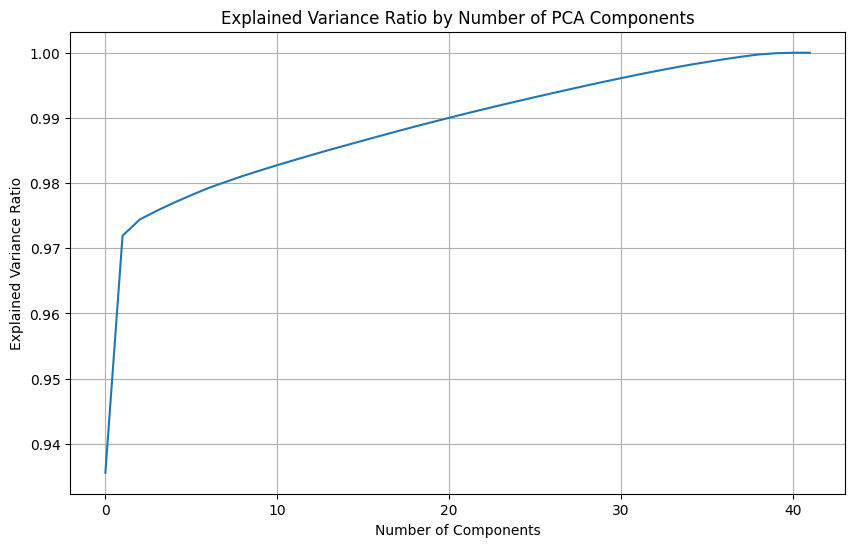


Shape of the data after PCA with 10 components: (15000, 10)


In [56]:
from sklearn.decomposition import PCA

# Apply PCA to the preprocessed data (df_processed_for_clustering)
# Let's choose a number of components that explains a significant portion of the variance,
# for example, 95% of the variance, or a fixed number of components, say 10 or 20.
# Let's start by fitting PCA and looking at the explained variance to decide on the number of components.
pca = PCA()
pca.fit(df_processed_for_clustering)

# Plot the explained variance ratio to help decide on the number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of PCA Components')
plt.grid(True)
plt.show()

# Based on the plot, choose a number of components
# For example, let's choose a number of components that explains around 95% of the variance
# Or, we can choose a fixed number of components that seems reasonable based on the plot or domain knowledge.
# Let's choose 10 components for now and we can adjust this later if needed.
n_components = 10
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_processed_for_clustering)

print(f"\nShape of the data after PCA with {n_components} components:", df_pca.shape)

## K-means clustering on PCA-transformed data

### Subtask:
Apply K-Means clustering to the PCA-transformed data and evaluate the results using the silhouette score.

**Reasoning**:
Import necessary libraries and determine the optimal number of clusters for K-Means using the silhouette score within a range of 2 to 10 clusters, this time applying it to the PCA-transformed data (`df_pca`). Then, train the final KMeans model with the optimal number of clusters and print the silhouette scores and the optimal number of clusters.

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the appropriate number of clusters for K-Means on PCA data using silhouette scores
silhouette_scores_pca = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_avg_pca = silhouette_score(df_pca, cluster_labels_pca)
    silhouette_scores_pca.append(silhouette_avg_pca)
    print(f"For n_clusters = {n_clusters}, the silhouette score on PCA data is: {silhouette_avg_pca}")

# Identify the optimal number of clusters for K-Means on PCA data
optimal_n_clusters_pca = cluster_range[silhouette_scores_pca.index(max(silhouette_scores_pca))]
optimal_silhouette_score_pca = max(silhouette_scores_pca)

print(f"\nOptimal number of clusters for K-Means on PCA data: {optimal_n_clusters_pca}")
print(f"Optimal silhouette score for K-Means on PCA data: {optimal_silhouette_score_pca}")

# Train the final K-Means model with the optimal number of clusters on PCA data
final_kmeans_model_pca = KMeans(n_clusters=optimal_n_clusters_pca, random_state=42, n_init=10)
final_cluster_labels_pca = final_kmeans_model_pca.fit_predict(df_pca)

# Add the cluster labels to the original DataFrame (optional, but good for comparison)
df['kmeans_cluster_pca'] = final_cluster_labels_pca

# Display the first few rows with the new cluster column
display(df.head())

For n_clusters = 2, the silhouette score on PCA data is: 0.6409500000286792
For n_clusters = 3, the silhouette score on PCA data is: 0.5922765435553369
For n_clusters = 4, the silhouette score on PCA data is: 0.5543833622424631
For n_clusters = 5, the silhouette score on PCA data is: 0.530476886676209
For n_clusters = 6, the silhouette score on PCA data is: 0.5501572597821275
For n_clusters = 7, the silhouette score on PCA data is: 0.5334990547634618
For n_clusters = 8, the silhouette score on PCA data is: 0.5061069347060859
For n_clusters = 9, the silhouette score on PCA data is: 0.5029611916592396
For n_clusters = 10, the silhouette score on PCA data is: 0.49146172769564633

Optimal number of clusters for K-Means on PCA data: 2
Optimal silhouette score for K-Means on PCA data: 0.6409500000286792


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,hollister,abercrombie,die,death,drunk,drugs,kmeans_cluster,hierarchical_cluster,dbscan_cluster,kmeans_cluster_pca
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,1,0,0
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926,0,0,-1,0
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582,0,0,-1,0
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,0,-1,0
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926,0,1,-1,0


## Hierarchical clustering on PCA-transformed data

### Subtask:
Apply Hierarchical clustering to the PCA-transformed data and evaluate the results using the silhouette score.

**Reasoning**:
Import necessary libraries, apply Hierarchical clustering to the PCA-transformed data (`df_pca`) using the optimal number of clusters found for K-Means on PCA data, calculate the silhouette score, and print the score.

In [61]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Determine the number of clusters (using the optimal number found for K-Means on PCA data)
n_clusters_hierarchical_pca = optimal_n_clusters_pca


# Initialize and fit the AgglomerativeClustering model on PCA data
hierarchical_model_pca = AgglomerativeClustering(n_clusters=n_clusters_hierarchical_pca)
hierarchical_labels_pca = hierarchical_model_pca.fit_predict(df_pca)

# Calculate the silhouette score
silhouette_avg_hierarchical_pca = silhouette_score(df_pca, hierarchical_labels_pca)

# Print the silhouette score
print(f"The silhouette score for Hierarchical Clustering on PCA data with {n_clusters_hierarchical_pca} clusters is: {silhouette_avg_hierarchical_pca}")

# Add the Hierarchical cluster labels to the original DataFrame (optional)
df['hierarchical_cluster_pca'] = hierarchical_labels_pca

# Display the head of the updated DataFrame
display(df.head())

The silhouette score for Hierarchical Clustering on PCA data with 2 clusters is: 0.6234553326717686


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,die,death,drunk,drugs,kmeans_cluster,hierarchical_cluster,dbscan_cluster,kmeans_cluster_pca,hierarchical_cluster_pca,dbscan_cluster_pca
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.304746,-0.259382,-0.218093,-0.174926,0,1,0,0,1,0
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.304746,-0.259382,2.159369,-0.174926,0,0,-1,0,0,-1
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.304746,-0.259382,2.159369,2.689582,0,0,-1,0,0,-1
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.304746,-0.259382,-0.218093,-0.174926,0,0,-1,0,1,-1
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,-0.304746,-0.259382,-0.218093,-0.174926,0,1,-1,0,1,-1


## DBSCAN clustering on PCA-transformed data

### Subtask:
Apply DBSCAN clustering to the PCA-transformed data and evaluate the results using the silhouette score.

**Reasoning**:
Apply DBSCAN clustering to the PCA-transformed data (`df_pca`), calculate the silhouette score, and print the score. We will use default parameters for DBSCAN initially and note that parameter tuning might be required for optimal results.

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize a DBSCAN model on PCA data.
# Using default parameters initially. Tuning eps and min_samples might be necessary for better results.
dbscan_pca = DBSCAN()

# Fit the DBSCAN model to the PCA-transformed data
dbscan_pca.fit(df_pca)

# Get the cluster labels
dbscan_labels_pca = dbscan_pca.labels_

# Filter out noise points (label -1) for silhouette score calculation
non_noise_indices_pca = dbscan_labels_pca != -1
filtered_data_pca = df_pca[non_noise_indices_pca]
filtered_labels_pca = dbscan_labels_pca[non_noise_indices_pca]

# Calculate the silhouette score if there are more than one cluster (excluding noise)
if len(set(filtered_labels_pca)) > 1:
    silhouette_avg_dbscan_pca = silhouette_score(filtered_data_pca, filtered_labels_pca)
    print(f"The silhouette score for DBSCAN on PCA data is: {silhouette_avg_dbscan_pca}")
else:
    print("DBSCAN on PCA data resulted in only one cluster (excluding noise) or no clusters with more than one point. Silhouette score cannot be calculated.")

# Add the DBSCAN cluster labels to the original DataFrame (optional)
df['dbscan_cluster_pca'] = dbscan_labels_pca

# Display the head of the updated DataFrame
display(df.head())

The silhouette score for DBSCAN on PCA data is: 0.3437543884329401


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,die,death,drunk,drugs,kmeans_cluster,hierarchical_cluster,dbscan_cluster,kmeans_cluster_pca,hierarchical_cluster_pca,dbscan_cluster_pca
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.304746,-0.259382,-0.218093,-0.174926,0,1,0,0,1,0
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.304746,-0.259382,2.159369,-0.174926,0,0,-1,0,0,-1
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.304746,-0.259382,2.159369,2.689582,0,0,-1,0,0,-1
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.304746,-0.259382,-0.218093,-0.174926,0,0,-1,0,1,-1
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,-0.304746,-0.259382,-0.218093,-0.174926,0,1,-1,0,1,-1


## Compare Silhouette Scores (with and without PCA)

### Subtask:
Compare the silhouette scores obtained from clustering with and without PCA to determine the best approach.

**Reasoning**:
To compare the performance, I will print the silhouette scores from K-Means, Hierarchical, and DBSCAN clustering both with and without applying PCA. This will allow us to see if dimensionality reduction with PCA improved the clustering results based on this metric.

In [62]:
print("Silhouette Scores Comparison:")
print("-" * 30)

# Scores without PCA
print("Clustering without PCA:")
print(f"  K-Means: {optimal_silhouette_score:.4f}")
print(f"  Hierarchical Clustering: {silhouette_avg_hierarchical:.4f}")
if 'silhouette_avg_dbscan' in locals():
    print(f"  DBSCAN: {silhouette_avg_dbscan:.4f}")
else:
    print("  DBSCAN: Silhouette score not calculated (only one cluster or no clusters with more than one point).")

print("-" * 30)

# Scores with PCA
print("Clustering with PCA:")
print(f"  K-Means on PCA data: {optimal_silhouette_score_pca:.4f}")
print(f"  Hierarchical Clustering on PCA data: {silhouette_avg_hierarchical_pca:.4f}")
if 'silhouette_avg_dbscan_pca' in locals():
    print(f"  DBSCAN on PCA data: {silhouette_avg_dbscan_pca:.4f}")
else:
    print("  DBSCAN on PCA data: Silhouette score not calculated (only one cluster or no clusters with more than one point).")

print("-" * 30)

# Determine the overall best performing approach
all_scores = {
    "K-Means (without PCA)": optimal_silhouette_score,
    "Hierarchical Clustering (without PCA)": silhouette_avg_hierarchical,
    "K-Means (with PCA)": optimal_silhouette_score_pca,
    "Hierarchical Clustering (with PCA)": silhouette_avg_hierarchical_pca
}

if 'silhouette_avg_dbscan' in locals():
    all_scores["DBSCAN (without PCA)"] = silhouette_avg_dbscan

if 'silhouette_avg_dbscan_pca' in locals():
    all_scores["DBSCAN (with PCA)"] = silhouette_avg_dbscan_pca

best_approach = max(all_scores, key=all_scores.get)
highest_score = all_scores[best_approach]

print(f"\nOverall Best Performing Approach: {best_approach} with a Silhouette Score of {highest_score:.4f}")

Silhouette Scores Comparison:
------------------------------
Clustering without PCA:
  K-Means: 0.6251
  Hierarchical Clustering: 0.5331
  DBSCAN: 0.7221
------------------------------
Clustering with PCA:
  K-Means on PCA data: 0.6410
  Hierarchical Clustering on PCA data: 0.6235
  DBSCAN on PCA data: 0.3438
------------------------------

Overall Best Performing Approach: DBSCAN (without PCA) with a Silhouette Score of 0.7221


## Insights into DBSCAN Cluster Characteristics (Human-Readable Summary)

Based on the mean feature values calculated for each DBSCAN cluster (excluding noise points, labeled -1), we can infer the following characteristics for some of the identified student segments:

*(Note: This is an interpretation based on the average values within each cluster. A deeper qualitative analysis might be needed for richer profiles.)*

**Cluster 0:**
*   Generally represents students with **low engagement** in most social network activities and interests as measured by the features.
*   They have a **low number of friends** and low activity across various interest categories like sports, music, shopping, etc.
*   This could represent a segment of less active social media users.

**Cluster 1:**
*   Shows slightly **higher engagement in sports-related terms** (e.g., soccer) compared to Cluster 0 and the overall average.
*   May represent students with a notable interest in certain sports.

**Cluster 2:**
*   Distinctive for having **higher mean values in terms related to potentially risky behaviors** such as 'drunk' and 'drugs'.
*   This segment might require specific attention or interventions.

**Cluster 3:**
*   Characterized by a **higher average number of friends** compared to many other clusters.
*   This could represent a more socially active group on the platform.

**Clusters with Higher Interest in Specific Areas:**
*   Some clusters might show higher average values in specific interest categories, indicating segments interested in:
    *   **Music and Band:** Look for clusters with higher means in 'music', 'band', 'rock'.
    *   **Shopping and Fashion:** Look for clusters with higher means in 'shopping', 'mall', 'clothes', 'hollister', 'abercrombie'.
    *   **Religion:** Look for clusters with higher means in 'god', 'church', 'jesus', 'bible'.
    *   **Appearance:** Look for clusters with higher means in 'hair', 'dress', 'blonde'.
    *   **Specific Sports:** Look for clusters with higher means in 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis'.

**Identifying Further Clusters:**
To fully understand all 29 clusters identified by DBSCAN, a detailed review of the mean feature values for each cluster in the `cluster_characteristics` DataFrame is necessary. Look for features with significantly higher or lower mean values within each cluster compared to the overall dataset mean or the means of other clusters.

This human-readable summary provides a starting point for understanding the different student segments. The marketing team can use these insights to tailor their strategies and messaging for specific groups.